In [58]:
import glob
import sys
import math
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


lem = WordNetLemmatizer()



sw_nltk_list = stopwords.words('english') # stopwords to remove them before stemming
waste = ['<','>','/','.','br','(',')',',','<br>',"/>",'><','/><br>','\'','/><br']
sw_nltk_list.extend(waste)
sw_nltk = {}
for i in range(len(sw_nltk_list)):
    sw_nltk[sw_nltk_list[i]]=1
    

print(sw_nltk)
ps = PorterStemmer()# stemming function



#train_path = str(sys.argv[1])
#test_path = str(sys.argv[1])
train_path = 'part1_data/train'
test_path = 'part1_data/test'

train_pos_files = glob.glob(train_path+'/pos/*.txt')
train_neg_files = glob.glob(train_path+'/neg/*.txt')

test_pos_files = glob.glob(test_path+'/pos/*.txt')
test_neg_files = glob.glob(test_path+'/neg/*.txt')

len_train_pos = len(train_pos_files)
len_train_neg = len(train_neg_files)

len_test_pos = len(test_pos_files)
len_test_neg = len(test_neg_files)


# print(len_train_pos)
# print(len_train_neg)

# print(len_test_pos)
# print(len_test_neg)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/khyateeswarnaidunalla/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/khyateeswarnaidunalla/nltk_data...


{'i': 1, 'me': 1, 'my': 1, 'myself': 1, 'we': 1, 'our': 1, 'ours': 1, 'ourselves': 1, 'you': 1, "you're": 1, "you've": 1, "you'll": 1, "you'd": 1, 'your': 1, 'yours': 1, 'yourself': 1, 'yourselves': 1, 'he': 1, 'him': 1, 'his': 1, 'himself': 1, 'she': 1, "she's": 1, 'her': 1, 'hers': 1, 'herself': 1, 'it': 1, "it's": 1, 'its': 1, 'itself': 1, 'they': 1, 'them': 1, 'their': 1, 'theirs': 1, 'themselves': 1, 'what': 1, 'which': 1, 'who': 1, 'whom': 1, 'this': 1, 'that': 1, "that'll": 1, 'these': 1, 'those': 1, 'am': 1, 'is': 1, 'are': 1, 'was': 1, 'were': 1, 'be': 1, 'been': 1, 'being': 1, 'have': 1, 'has': 1, 'had': 1, 'having': 1, 'do': 1, 'does': 1, 'did': 1, 'doing': 1, 'a': 1, 'an': 1, 'the': 1, 'and': 1, 'but': 1, 'if': 1, 'or': 1, 'because': 1, 'as': 1, 'until': 1, 'while': 1, 'of': 1, 'at': 1, 'by': 1, 'for': 1, 'with': 1, 'about': 1, 'against': 1, 'between': 1, 'into': 1, 'through': 1, 'during': 1, 'before': 1, 'after': 1, 'above': 1, 'below': 1, 'to': 1, 'from': 1, 'up': 1, 'dow

In [50]:
def predict(s,pos_voc,neg_voc,len_pos_tot,len_neg_tot):
    s=s.split()
    p1 = 0
    n1 = 0
    for i in range(len(s)):
        if pos_voc.get(s[i])!=None or neg_voc.get(s[i])!=None :
            if pos_voc.get(s[i])!=None:
                p1 = p1 + math.log((pos_voc.get(s[i])+1)/(len_pos_tot+len(pos_voc)))
            else:
                p1 = p1 + math.log(1/(len(pos_voc)+len_pos_tot))
            if(neg_voc.get(s[i])!=None):
                n1 = n1 + math.log((neg_voc.get(s[i])+1)/(len_neg_tot+len(neg_voc)))
            else:
                n1 = n1 + math.log(1/(len(neg_voc)+len_neg_tot))
    p1 = p1+math.log(len_train_pos/(len_train_pos+len_train_neg)) #prior probability
    n1 = n1 + math.log(len_train_neg/(len_train_pos+len_train_neg))
    if(p1>=n1):
        return True
    return False

def predict_stem(s,pos_voc,neg_voc,len_pos_tot,len_neg_tot):
    s=s.split()
    p1=0
    n1=0
    for i in range(len(s)):
        s[i] = ps.stem(s[i])
        if not (sw_nltk.get(s[i])!=None):
            if pos_voc.get(s[i])!=None or neg_voc.get(s[i])!=None :
                if pos_voc.get(s[i])!=None:
                    p1 = p1 + math.log((pos_voc.get(s[i])+1)/(len_pos_tot+len(pos_voc)))
                else:
                    p1 = p1 + math.log(1/(len(pos_voc)+len_pos_tot))
                if(neg_voc.get(s[i])!=None):
                    n1 = n1 + math.log((neg_voc.get(s[i])+1)/(len_neg_tot+len(neg_voc)))
                else:
                    n1 = n1 + math.log(1/(len(neg_voc)+len_neg_tot))
    p1 = p1+math.log(len_train_pos/(len_train_pos+len_train_neg)) #prior probability
    n1 = n1 + math.log(len_train_neg/(len_train_pos+len_train_neg))
    if(p1>=n1):
        return True
    return False

def predict_bigram(s,pos_voc,neg_voc,len_pos_tot,len_neg_tot):
    s=s.split()
    p1=0
    n1=0
    w=[]
    for i in range(1,len(s)):
        if not(sw_nltk.get(s[i])!=None):
            w.append(ps.stem(s[i]))
    s=w
    for i in range(1,len(s)):
        t=s[i-1]+s[i]
        if pos_voc.get(t)!=None:
            p1 = p1 + math.log((pos_voc.get(t)+1)/(len_pos_tot+len(pos_voc)))
        else:
            p1 = p1 + math.log(1/(len(pos_voc)+len_pos_tot))
        if(neg_voc.get(t)!=None):
            n1 = n1 + math.log((neg_voc.get(t)+1)/(len_neg_tot+len(neg_voc)))
        else:
            n1 = n1 + math.log(1/(len(neg_voc)+len_neg_tot))
    p1 = p1+math.log(len_train_pos/(len_train_pos+len_train_neg)) #prior probability
    n1 = n1 + math.log(len_train_neg/(len_train_pos+len_train_neg))
    if(p1>=n1):
        return True
    return False
        
    
def predict_bigram_ex(s,pos_voc,neg_voc,len_pos_tot,len_neg_tot):
    s=s.split()
    p1=0
    n1=0
    w=[]
    for i in range(1,len(s)):
        if not(sw_nltk.get(s[i])!=None):
            w.append(lem.lemmatize(ps.stem(s[i])))
    s=w
    for i in range(1,len(s)):
        t=s[i-1]+s[i]
        if pos_voc.get(t)!=None:
            p1 = p1 + math.log((pos_voc.get(t)+1)/(len_pos_tot+len(pos_voc)))
        else:
            p1 = p1 + math.log(1/(len(pos_voc)+len_pos_tot))
        if(neg_voc.get(t)!=None):
            n1 = n1 + math.log((neg_voc.get(t)+1)/(len_neg_tot+len(neg_voc)))
        else:
            n1 = n1 + math.log(1/(len(neg_voc)+len_neg_tot))
    p1 = p1+math.log(len_train_pos/(len_train_pos+len_train_neg)) #prior probability
    n1 = n1 + math.log(len_train_neg/(len_train_pos+len_train_neg))
    if(p1>=n1):
        return True
    return False
        
    

In [51]:
def show_pos_wc(sort_pos_voc):
    s={}
    for i in range(2000):
        s[sort_pos_voc[i][0]]=sort_pos_voc[i][1]      
    stopwords = set(STOPWORDS)
    pos_wc = WordCloud(background_color='white',max_words=2000,stopwords=stopwords)
    pos_wc.generate_from_frequencies(s)
    plt.imshow(pos_wc, interpolation='bilinear')
    plt.axis('off')
    plt.show(block=False)
    plt.savefig("pos_wordcloud.png")
    return

def show_neg_wc(sort_neg_voc):
    s={}
    for i in range(2000):
        s[sort_neg_voc[i][0]]=sort_neg_voc[i][1]
    stopwords = set(STOPWORDS)
    neg_wc = WordCloud(background_color='white',max_words=2000,stopwords=stopwords)
    neg_wc.generate_from_frequencies(s)
    plt.imshow(neg_wc, interpolation='bilinear')
    plt.axis('off')
    plt.show(block=False)
    plt.savefig("neg_wordcloud.png")
    return

In [52]:


def part_a():
    pos_voc = {}
    neg_voc = {}
    tot_voc = {}

    len_pos_tot =0
    len_neg_tot = 0

    for i in range(len_train_pos):
        f = open(train_pos_files[i], "r",encoding='utf8')
        s=f.read()
        #print(s)
        s=s.split()
        #print(s)
        for j in range(len(s)):
            len_pos_tot=len_pos_tot+1
            if pos_voc.get(s[j])!=None:
                pos_voc[s[j]] = pos_voc[s[j]]+1
            else:
                pos_voc[s[j]]=1

            if tot_voc.get(s[j])!=None:
                tot_voc[s[j]] = tot_voc[s[j]]+1
            else:
                tot_voc[s[j]]=1

    for i in range(len_train_neg):
        f = open(train_neg_files[i], "r",encoding='utf8')
        s=f.read()
        #print(s)
        s=s.split()
        #print(s)
        for j in range(len(s)):
            len_neg_tot = len_neg_tot+1
            if neg_voc.get(s[j])!=None:
                neg_voc[s[j]] = neg_voc[s[j]]+1
            else:
                neg_voc[s[j]]=1

            if tot_voc.get(s[j])!=None:
                tot_voc[s[j]] = tot_voc[s[j]]+1
            else:
                tot_voc[s[j]]=1
            
            
    # print(len(pos_voc))
    # print(len(neg_voc))
    # print(len(tot_voc))
    # print(len_pos_tot)
    # print(len_neg_tot)
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    for i in range(len_test_pos):
        f = open(test_pos_files[i], "r",encoding='utf8')
        s=f.read()
        if (predict(s,pos_voc,neg_voc,len_pos_tot,len_neg_tot)):
            tp = tp+1 
        else:
            fn = fn+1
        
    for i in range(len_test_neg):
        f = open(test_neg_files[i], "r",encoding='utf8')
        s=f.read()
        if (predict(s,pos_voc,neg_voc,len_pos_tot,len_neg_tot)):
            fp = fp+1 
        else:
            tn = tn+1
    print(tp)
    print(fp)
    print(fn)
    print(tn)
    accuracy = (tp+tn)/(tp+fn+fp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    F1_score = 2*(precision*recall)/(precision+recall)
    print(accuracy)
    print(precision)
    print(recall)
    print(F1_score)
    print("  ")
    print("for training dataset")
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    for i in range(len_train_pos):
        f = open(train_pos_files[i], "r",encoding='utf8')
        s=f.read()
        if (predict(s,pos_voc,neg_voc,len_pos_tot,len_neg_tot)):
            tp = tp+1 
        else:
            fn = fn+1
        
    for i in range(len_train_neg):
        f = open(train_neg_files[i], "r",encoding='utf8')
        s=f.read()
        if (predict(s,pos_voc,neg_voc,len_pos_tot,len_neg_tot)):
            fp = fp+1 
        else:
            tn = tn+1
    print(tp)
    print(fp)
    print(fn)
    print(tn)
    accuracy = (tp+tn)/(tp+fn+fp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    F1_score = 2*(precision*recall)/(precision+recall)
    print(accuracy)
    print(precision)
    print(recall)
    print(F1_score)
    
    
    sort_pos_voc = sorted(pos_voc.items(),key=lambda kv:(kv[1], kv[0]),reverse = True)
    sort_neg_voc = sorted(neg_voc.items(),key=lambda kv:(kv[1], kv[0]),reverse = True)
    show_pos_wc(sort_pos_voc)
    show_neg_wc(sort_neg_voc)
    return

In [53]:
def part_b():
    acc=0
    for i in range(len_test_pos):
        if(random.random()>=0.5):
            acc=acc+1
    for i in range(len_test_neg):
        if(random.random()<=0.5):
            acc = acc+1
    print("random prediction accuracy = "+str(acc/(len_test_pos+len_test_neg)))
    print("predicting everything as positive accuracy = "+str(len_test_pos/(len_test_pos+len_test_neg)))
    
    

7704
611
2296
4389
0.8062
0.9265183403487672
0.7704
0.8412776412776413
  
for training dataset
11565
336
935
12164
0.94916
0.9717670783967733
0.9252
0.947911970820868


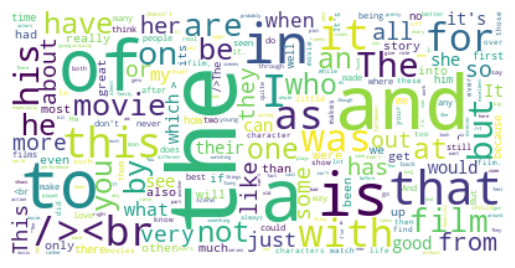

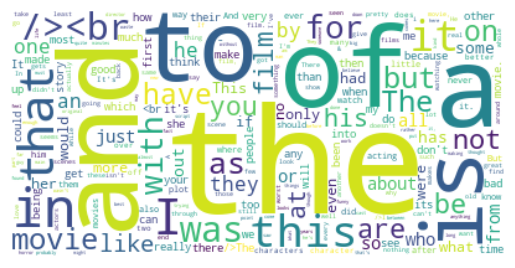

In [24]:
part_a()

In [54]:
def part_d():
    pos_voc={}
    neg_voc={}
    len_pos_tot =0
    len_neg_tot = 0
    for i in range(len_train_pos):
        f = open(train_pos_files[i], "r",encoding='utf8')
        s=f.read()
        s=s.split()
        for j in range(len(s)):
            if not ( sw_nltk.get(s[j])!=None):
                len_pos_tot=len_pos_tot+1
                s[j]=ps.stem(s[j])
                if pos_voc.get(s[j])!=None:
                    pos_voc[s[j]] = pos_voc[s[j]]+1
                else:
                    pos_voc[s[j]]=1

                    
    for i in range(len_train_neg):
        f = open(train_neg_files[i], "r",encoding='utf8')
        s=f.read()
        s=s.split()
        for j in range(len(s)):
            if not (sw_nltk.get(s[j])!=None):
                len_neg_tot=len_neg_tot+1
                s[j]=ps.stem(s[j])
                if neg_voc.get(s[j])!=None:
                    neg_voc[s[j]] = neg_voc[s[j]]+1
                else:
                    neg_voc[s[j]]=1
    
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    for i in range(len_train_pos):
        f = open(train_pos_files[i], "r",encoding='utf8')
        s=f.read()
        if (predict_stem(s,pos_voc,neg_voc,len_pos_tot,len_neg_tot)):
            tp = tp+1 
        else:
            fn = fn+1
        
    for i in range(len_train_neg):
        f = open(train_neg_files[i], "r",encoding='utf8')
        s=f.read()
        if (predict_stem(s,pos_voc,neg_voc,len_pos_tot,len_neg_tot)):
            fp = fp+1 
        else:
            tn = tn+1
    print(tp)
    print(fp)
    print(fn)
    print(tn)
    accuracy = (tp+tn)/(tp+fn+fp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    F1_score = 2*(precision*recall)/(precision+recall)
    print(accuracy)
    print(precision)
    print(recall)
    print(F1_score)
    
    
    
    
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    for i in range(len_test_pos):
        f = open(test_pos_files[i], "r",encoding='utf8')
        s=f.read()
        if (predict_stem(s,pos_voc,neg_voc,len_pos_tot,len_neg_tot)):
            tp = tp+1 
        else:
            fn = fn+1
        
    for i in range(len_test_neg):
        f = open(test_neg_files[i], "r",encoding='utf8')
        s=f.read()
        if (predict_stem(s,pos_voc,neg_voc,len_pos_tot,len_neg_tot)):
            fp = fp+1 
        else:
            tn = tn+1
    print(tp)
    print(fp)
    print(fn)
    print(tn)
    accuracy = (tp+tn)/(tp+fn+fp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    F1_score = 2*(precision*recall)/(precision+recall)
    print(accuracy)
    print(precision)
    print(recall)
    print(F1_score)
    srt_pos_voc = sorted(pos_voc.items(),key=lambda kv:(kv[1], kv[0]),reverse = True)
    srt_neg_voc = sorted(neg_voc.items(),key=lambda kv:(kv[1], kv[0]),reverse = True)
    show_pos_wc(srt_pos_voc)
    show_neg_wc(srt_neg_voc)
    return
        
        
        
                
    

In [55]:
def part_e():
    pos_voc={}
    neg_voc={}
    pos_list=[]
    neg_list=[]
    len_pos_tot =0
    len_neg_tot = 0
    for i in range(len_train_pos):
        f = open(train_pos_files[i], "r",encoding='utf8')
        s=f.read()
        s=s.split()
        for j in range(len(s)):
            if not ( sw_nltk.get(s[j])!=None):
                len_pos_tot=len_pos_tot+1
                #s[j]=ps.stem(s[j])
                pos_list.append(ps.stem(s[j]))
                
                

                    
    for i in range(len_train_neg):
        f = open(train_neg_files[i], "r",encoding='utf8')
        s=f.read()
        s=s.split()
        for j in range(len(s)):
            if not (sw_nltk.get(s[j])!=None):
                len_neg_tot=len_neg_tot+1
                #s[j]=ps.stem(s[j])
                neg_list.append(ps.stem(s[j]));
                
                
                    
                    
    for j in range(1,len(pos_list)):
        if pos_voc.get(pos_list[j]+pos_list[j-1])!=None:
            pos_voc[pos_list[j]+pos_list[j-1]] = pos_voc[pos_list[j]+pos_list[j-1]]+1
        else:
            pos_voc[pos_list[j]+pos_list[j-1]]=1
    
    for j in range(1,len(neg_list)):
        if neg_voc.get(neg_list[j]+neg_list[j-1])!=None:
            neg_voc[neg_list[j]+neg_list[j-1]] = neg_voc[neg_list[j]+neg_list[j-1]]+1
        else:
            neg_voc[neg_list[j]+neg_list[j-1]]=1
                    
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    for i in range(len_test_pos):
        f = open(test_pos_files[i], "r",encoding='utf8')
        s=f.read()
        if (predict_bigram(s,pos_voc,neg_voc,len_pos_tot,len_neg_tot)):
            tp = tp+1
        else:
            fn = fn+1
        
    for i in range(len_test_neg):
        f = open(test_neg_files[i], "r",encoding='utf8')
        s=f.read()
        if (predict_bigram(s,pos_voc,neg_voc,len_pos_tot,len_neg_tot)):
            fp = fp+1
        else:
            tn = tn+1
    print(tp)
    print(fp)
    print(fn)
    print(tn)
    accuracy = (tp+tn)/(tp+fn+fp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    F1_score = 2*(precision*recall)/(precision+recall)
    print(accuracy)
    print(precision)
    print(recall)
    print(F1_score)
    sort_pos_voc = sorted(pos_voc.items(),key=lambda kv:(kv[1], kv[0]),reverse = True)
    sort_neg_voc = sorted(neg_voc.items(),key=lambda kv:(kv[1], kv[0]),reverse = True)
    show_pos_wc(sort_pos_voc)
    show_neg_wc(sort_neg_voc)
    return
                    
                    
    
        
        
        

In [56]:
def part_e_extra():
    pos_voc={}
    neg_voc={}
    pos_list=[]
    neg_list=[]
    len_pos_tot =0
    len_neg_tot = 0
    for i in range(len_train_pos):
        f = open(train_pos_files[i], "r",encoding='utf8')
        s=f.read()
        s=s.split()
        for j in range(len(s)):
            if not ( sw_nltk.get(s[j])!=None):
                len_pos_tot=len_pos_tot+1
                s[j]=lem.lemmatize(ps.stem(s[j]))
                pos_list.append(s[j])
                
                

                    
    for i in range(len_train_neg):
        f = open(train_neg_files[i], "r",encoding='utf8')
        s=f.read()
        s=s.split()
        for j in range(len(s)):
            if not (sw_nltk.get(s[j])!=None):
                len_neg_tot=len_neg_tot+1
                s[j]=lem.lemmatize(ps.stem(s[j]))
                neg_list.append(s[j]);
                
                
                    
                    
    for j in range(1,len(pos_list)):
        if pos_voc.get(pos_list[j]+pos_list[j-1])!=None:
            pos_voc[pos_list[j]+pos_list[j-1]] = pos_voc[pos_list[j]+pos_list[j-1]]+1
        else:
            pos_voc[pos_list[j]+pos_list[j-1]]=1
    
    for j in range(1,len(neg_list)):
        if neg_voc.get(neg_list[j]+neg_list[j-1])!=None:
            neg_voc[neg_list[j]+neg_list[j-1]] = neg_voc[neg_list[j]+neg_list[j-1]]+1
        else:
            neg_voc[neg_list[j]+neg_list[j-1]]=1
                    
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    for i in range(len_test_pos):
        f = open(test_pos_files[i], "r",encoding='utf8')
        s=f.read()
        if (predict_bigram_ex(s,pos_voc,neg_voc,len_pos_tot,len_neg_tot)):
            tp = tp+1
        else:
            fn = fn+1
        
    for i in range(len_test_neg):
        f = open(test_neg_files[i], "r",encoding='utf8')
        s=f.read()
        if (predict_bigram_ex(s,pos_voc,neg_voc,len_pos_tot,len_neg_tot)):
            fp = fp+1
        else:
            tn = tn+1
    print(tp)
    print(fp)
    print(fn)
    print(tn)
    accuracy = (tp+tn)/(tp+fn+fp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    F1_score = 2*(precision*recall)/(precision+recall)
    print(accuracy)
    print(precision)
    print(recall)
    print(F1_score)
    sort_pos_voc = sorted(pos_voc.items(),key=lambda kv:(kv[1], kv[0]),reverse = True)
    sort_neg_voc = sorted(neg_voc.items(),key=lambda kv:(kv[1], kv[0]),reverse = True)
    show_pos_wc(sort_pos_voc)
    show_neg_wc(sort_neg_voc)
    return
                    

3739
326
6261
4674
0.5608666666666666
0.9198031980319803
0.3739
0.5316743690010665


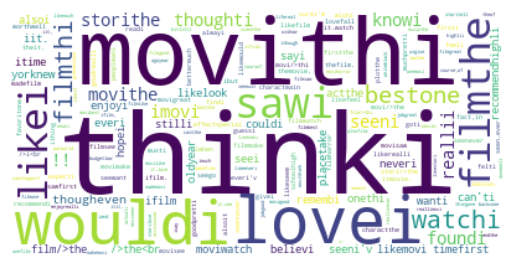

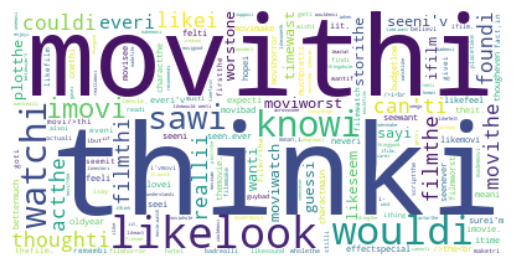

<Figure size 640x480 with 0 Axes>

In [60]:
part_e()